<center> UNIVERSIDADE FEDERAL DE MINAS GERAIS </center>

<center>ESCOLA DE CIÊNCIA DA INFORMAÇÃO </center>

<center>PÓS-GRADUAÇÃO EM GESTÃO E ORGANIZAÇÃO DO CONHECIMENTO </center>

<center> Representações Distribuídas de Texto e Modelagem de Tópicos </center>
----------------------------------------------
<center> Prof. Renato Rocha de Souza </center>
------------------------------------------

Aluna: Izabella Bauer de Assis Cunha
-----------------------------------------------------
Projeto: Modelagem de Tópicos em Internet das Coisas (IoT)
--------------------------------
<hr/>

### Introdução

O tema da minha dissertação é sobre Modelagem da Informação e Recuperação da Informação para Internet das Coisas (IoT) em edifícios. A ideia principal do trabalho é instalar sensores em locais específicos, com o intuito de monitorar vários indicadores e recuperar informações geradas pelos mesmos, como presença e movimentação de pessoas em um ambiente, temperatura e humidade do ar, luminosidade, consumo de energia de equipamentos como servidor, desktops e TV, etc. Com isso, utilizei este tema como proposta para o projeto de representações distribuídas de texto e modelagem de tópicos.

Como propósito, utilizei uma base de exemplo, criada por mim anteriormente para desenvolver o dashboard para o artigo submetido em IoT, e a outra base de dados busquei na internet (link), com informações capturadas de sensores, por exemplo, temperatura e humidade do ar de um ambiente. Após realizei um tratamento destes dados, retirando tópicos necessários, com o objetivo de enriquecer e treinar esta base de dados.

O intuito foi utilizar gráficos para visualização de dados, e Regressão Linear para possíveis análises preditivas, através das técnicas aprendidas em sala de aula. Estou entregado o produto final em formato de notebook na linguagem Python, desenvolvido no Jupyter, com o passo a passo do desenvolvimento e alguns gráficos incrementados (inspirado no dashboard abaixo), com informações atuais e preditivas.

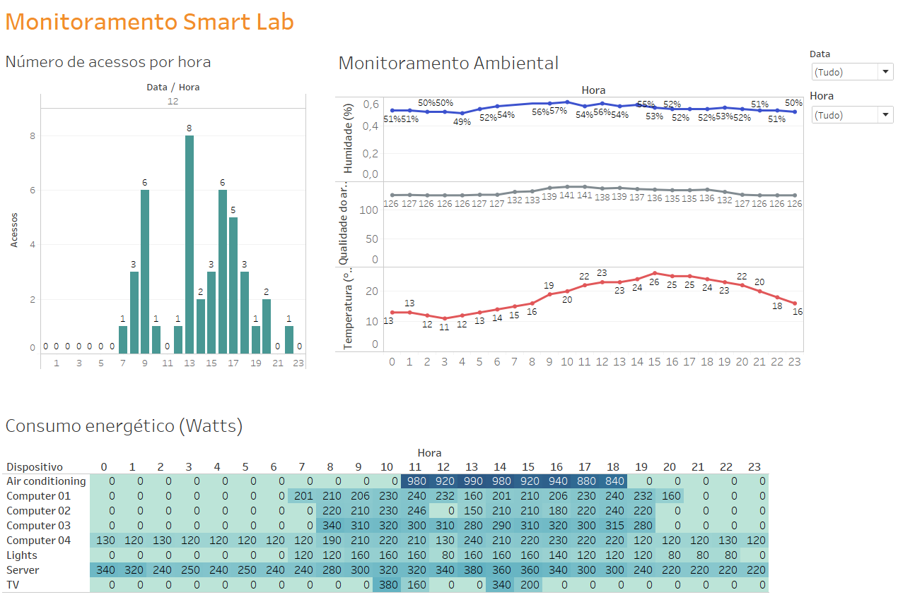

### Gráfico Número de acessos por hora

In [18]:
#Importa bibliotecas para desenvolvimento de visualização de dados instaladas no Anaconda
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly
import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
#Declara local dos arquivos
datapath = "../my/datasets/SmartLab/"
outputs = "../my/outputs/"

In [3]:
#Leitura do arquivo csv de Acessos para um dataframe
acessos = pd.read_csv(os.path.join(datapath, 'acessos.csv'))
acessos.head(10)

,Data,Hora,Acessos
0,12/08/2017,00:00,0
1,12/08/2017,01:00,0
2,12/08/2017,02:00,0
3,12/08/2017,03:00,0
4,12/08/2017,04:00,0
5,12/08/2017,05:00,0
6,12/08/2017,06:00,0
7,12/08/2017,07:00,1
8,12/08/2017,08:00,3
9,12/08/2017,09:00,6


In [4]:
acessos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Data       24 non-null object
Hora       24 non-null object
Acessos    24 non-null int64
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [5]:
#Converte a data de um objeto para o tipo datetime
acessos['Data'] = pd.to_datetime(acessos['Data'], format='%d/%m/%Y')
acessos.Data[0]

Timestamp('2017-08-12 00:00:00')

In [6]:
#Data convertida para datetime
acessos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Data       24 non-null datetime64[ns]
Hora       24 non-null object
Acessos    24 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 656.0+ bytes


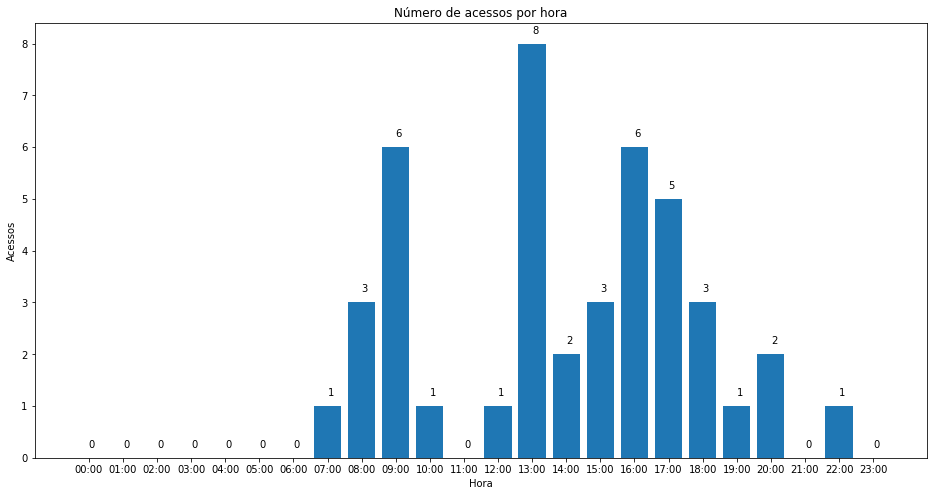

In [7]:
#Cria o gráfico de barras do Número de acessos por hora
plt.figure(figsize=(16,8))
y_axis = acessos['Hora']
x_axis = acessos['Acessos']
for i,v in enumerate(x_axis):
    plt.text(i , v+0.2, str(v))
width_n = 0.4
plt.bar(y_axis, x_axis)
plt.title('Número de acessos por hora')
plt.ylabel('Acessos')
plt.xlabel('Hora')
plt.show()

### Gráfico Monitoramento Ambiental

In [8]:
#Leitura do arquivo csv de Ambientes para um dataframe
ambiente = pd.read_csv(os.path.join(datapath, 'ambiente.csv'))
ambiente.head(10)

,Data,Hora,Temperatura,Humidade,Qualidade do ar
0,12/08/2017,00:00,13,51,125
1,12/08/2017,01:00,13,51,124
2,12/08/2017,02:00,12,50,126
3,12/08/2017,03:00,11,50,126
4,12/08/2017,04:00,12,49,126
5,12/08/2017,05:00,13,52,127
6,12/08/2017,06:00,14,54,127
7,12/08/2017,07:00,15,55,132
8,12/08/2017,08:00,16,56,133
9,12/08/2017,09:00,19,56,139


In [9]:
ambiente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Data               24 non-null object
Hora               24 non-null object
Temperatura        24 non-null int64
Humidade           24 non-null int64
Qualidade do ar    24 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.0+ KB


In [10]:
#Converte a data e hora de um objeto para o tipo datetime
ambiente['Data'] = pd.to_datetime(ambiente['Data'], format='%d/%m/%Y')
ambiente.Data[0]

Timestamp('2017-08-12 00:00:00')

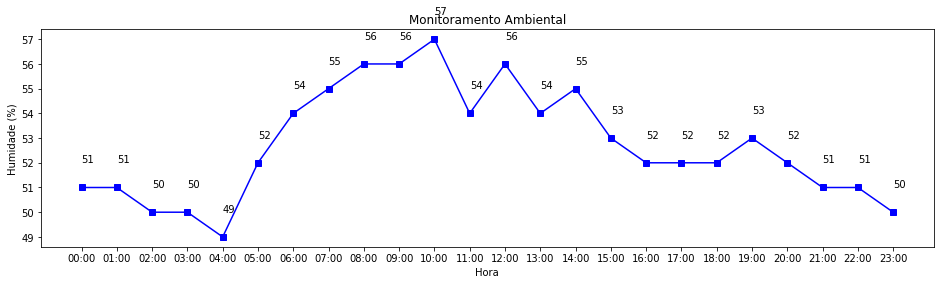

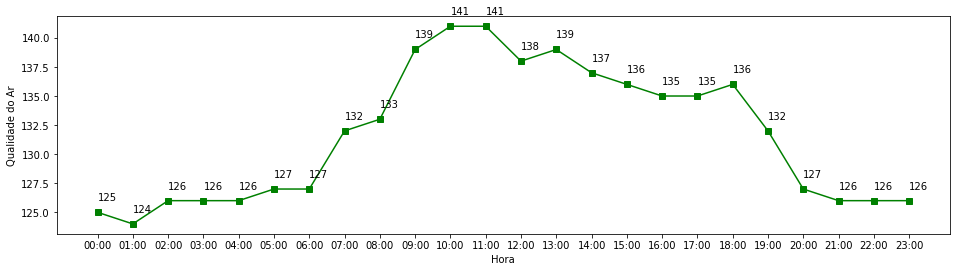

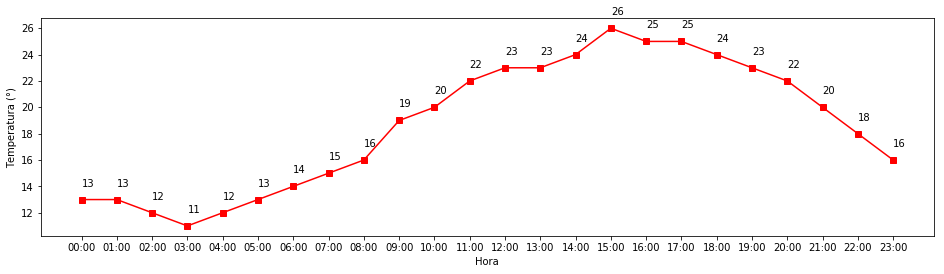

In [11]:
#Cria os gráficos de linhas - Humidade
plt.figure(figsize=(16,4))
plt.plot(ambiente['Hora'], ambiente['Humidade'], color='b', marker='s')
for i,v in enumerate(ambiente['Humidade']):
    plt.text(i , v +1 , str(v))
plt.title('Monitoramento Ambiental')
plt.ylabel('Humidade (%)')
plt.xlabel('Hora')

#Cria gráfico de linha - Qualidade do ar
plt.figure(figsize=(16,4))
plt.plot(ambiente['Hora'], ambiente['Qualidade do ar'], color='g', marker='s')
for i,v in enumerate(ambiente['Qualidade do ar']):
    plt.text(i , v +1 , str(v))
plt.ylabel('Qualidade do Ar')
plt.xlabel('Hora')

#Cria gráfico de linha - Temperatura
plt.figure(figsize=(16,4))
plt.plot(ambiente['Hora'], ambiente['Temperatura'], color='r', marker='s')
for i,v in enumerate(ambiente['Temperatura']):
    plt.text(i , v +1 , str(v))
plt.ylabel('Temperatura (°)')
plt.xlabel('Hora')

plt.show()

### Gráfico Consumo Energético (Watts)

In [12]:
#Leitura do arquivo csv de Consumo de Energia para um dataframe
consumo = pd.read_csv(os.path.join(datapath, 'consumo.csv'))
consumo.head(10)

,Data,Hora,Dispositivo,Kw
0,12/08/2017,00:00,Computer 01,0
1,12/08/2017,01:00,Computer 01,0
2,12/08/2017,02:00,Computer 01,0
3,12/08/2017,03:00,Computer 01,0
4,12/08/2017,04:00,Computer 01,0
5,12/08/2017,05:00,Computer 01,0
6,12/08/2017,06:00,Computer 01,0
7,12/08/2017,07:00,Computer 01,201
8,12/08/2017,08:00,Computer 01,210
9,12/08/2017,09:00,Computer 01,206


In [13]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Data           192 non-null object
Hora           192 non-null object
Dispositivo    192 non-null object
Kw             192 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [14]:
#Converte a data e hora de um objeto para o tipo datetime
consumo['Data'] = pd.to_datetime(consumo['Data'], format='%d/%m/%Y')
consumo.Data[0]

Timestamp('2017-08-12 00:00:00')

In [28]:
#Cria o gráfico Heatmap para Consumo de energia
py.iplot(
    dict(
        data=[
            dict(z=consumo['Kw'], x=consumo['Hora'], y=consumo['Dispositivo'], type='heatmap'),
        ],
        layout=dict(
            margin=dict(t=150,r=100,b=150,l=120),
            title='Consumo energético (Watts)',
            xaxis=dict(title='Hora', nticks=36),
            yaxis=dict(title='Dispositivo' ),
            width=900,
            height=700,
            autosize=True
        ) 
    ),
    filename="foobar.html"
)

### Regressão Linear

In [21]:
#Leitura do arquivo csv de Temperatura para um dataframe
#Desta base "GHCND_sample_csv" importada do link https://www.ncdc.noaa.gov/data-access, utilizei os campos DATE, TMAX, TMIN
linear = pd.read_csv(os.path.join(datapath, 'GHCND_sample_csv.csv'))
linear.head(10)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,01/10/2010,37,11,0
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,02/10/2010,24,22,0
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,03/10/2010,34,28,0
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,04/10/2010,26,20,15
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,05/10/2010,33,16,9999
5,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,06/10/2010,33,17,9999
6,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,07/10/2010,31,17,0
7,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,08/10/2010,33,28,0
8,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,09/10/2010,33,22,0
9,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,10/10/2010,27,24,0


In [22]:
linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
STATION         31 non-null object
STATION_NAME    31 non-null object
ELEVATION       31 non-null float64
LATITUDE        31 non-null float64
LONGITUDE       31 non-null float64
DATE            31 non-null object
TMAX            31 non-null int64
TMIN            31 non-null int64
PRCP            31 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.3+ KB


In [23]:
#Converte a data de um objeto para o tipo datetime
linear['DATE'] = pd.to_datetime(linear['DATE'], format='%d/%m/%Y')
linear.DATE[0]

Timestamp('2010-10-01 00:00:00')

In [24]:
#Criar um campo com a Variação da temperatura máxima para temperatura mínima
linear['VARIATION TEMP'] = linear['TMAX'].sub(linear['TMIN'])

In [25]:
linear.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,TMAX,TMIN,PRCP,VARIATION TEMP
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-10-01,37,11,0,26
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-10-02,24,22,0,2
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-10-03,34,28,0,6
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-10-04,26,20,15,6
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,2010-10-05,33,16,9999,17


In [26]:
#Criar um gráfico de linha para mostrar os valores da temperatura mínima por dia
x1=linear.DATE
y1=linear.TMIN
data = [go.Scatter(x=x1, y=y1)]

layout = go.Layout(
    xaxis=dict(title='Data'
              ),
    yaxis=dict(
        range=[min(x1), max(y1)],
        title='Temperatura'
    ))

fig = go.Figure(data = data, layout = layout)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='labelled-heatmap.html')

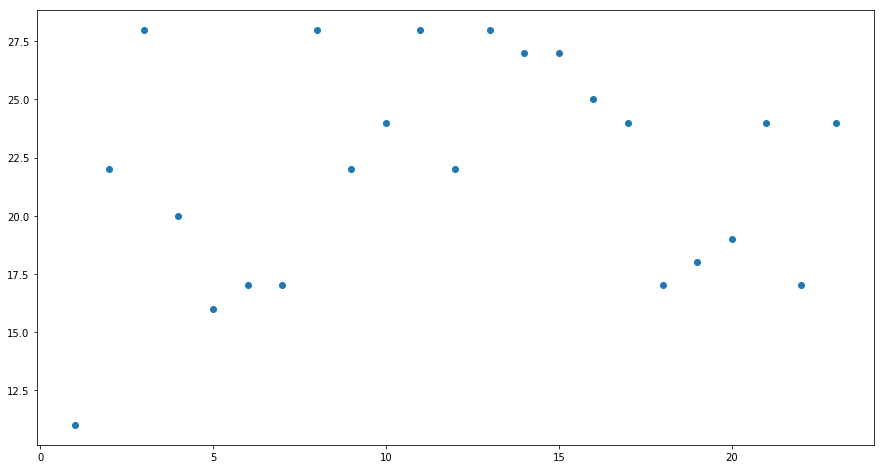

In [93]:
#Mostrar os dados que serão utilizados para a regressão linear TMIN
from scipy.stats import linregress

#Não consegui usar nesta fase o campo TMIN, ocorreu vários erros ao processar, e por isto coloquei os dados manualmente para exemplificar
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22 ,23])
y = np.array([11, 22, 28, 20, 16, 17, 17, 28, 22, 24, 28, 22, 28, 27, 27, 25, 24, 17, 18, 19, 24, 17, 24])

p = plt.plot(x,y, 'o')

In [94]:
def lin_regression(x, y):
   
    m, b, R, p, SEm = linregress(x, y)

    n = len(x)
    SSx = np.var(x, ddof=1) * (n-1)  # this is sum( (x - mean(x))**2 )
    SEb2 = SEm**2 * (SSx/n + np.mean(x)**2)
    SEb = SEb2**0.5

    return m, b, SEm, SEb, R, p

In [97]:
#Não consegui corrigir este erro de format neste passo
print('m = {:>.4g} +- {:6.4f}'.format(m, Sm))
print('b = {:>.4g} +- {:6.4f}\n'.format(b, Sb))

print('R2 = {:7.5f}'.format(R**2))
print('p of test F : {:<8.6f}'.format(p))

m = -0.2492 +- 0.3462
b = 29.83 +- 10.7856

R2 = 0.04137


TypeError: unsupported format string passed to list.__format__

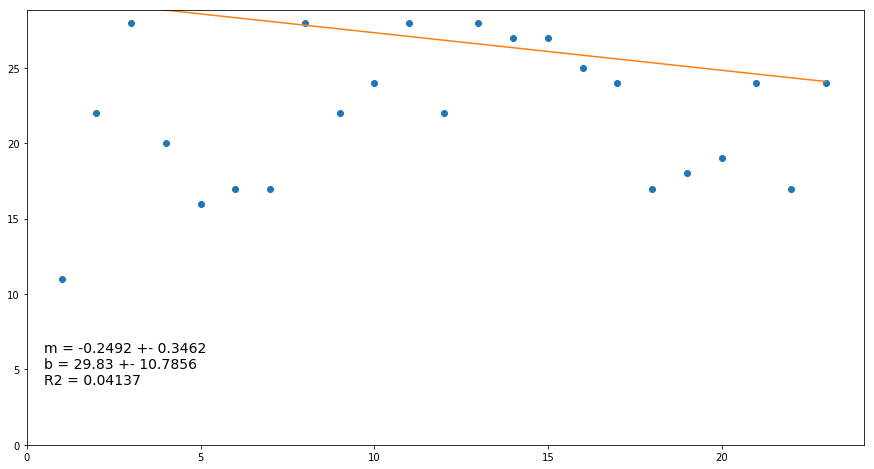

In [99]:
#Gráfico da regressão linear da temperatura mínima
plt.plot(x,y, 'o')
plt.xlim(0,None)
plt.ylim(0, None)

x2 = np.array([0, max(x)])

plt.plot(x2, m * x2 + b, '-')

ptxt = 'm = {:>.4g} +- {:6.4f}\nb = {:>.4g} +- {:6.4f}\nR2 = {:7.5f}'

t = plt.text(0.5, 4, ptxt.format(m, Sm, b, Sb, R**2), fontsize=14)